Importing all the necessary libraries.

Creates an IIR notch filter that filters out a single frequency from a signal. The signal is a simulated signal of two sinusoidal frequencies

In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np


Defining the specifications of the IIR Bandpass Notch-Filter

In [2]:

# Create/view notch filter
samp_freq = 1000  # Sample frequency (Hz)
notch_freq = 70.0  # Frequency to be removed from signal (Hz)
quality_factor = 10.0  # Quality factor

Design notch filter

In [3]:
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)

# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=2*np.pi)


Plots

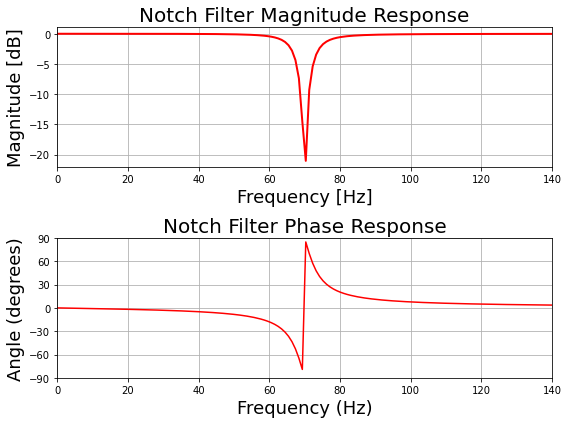

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
ax[0].plot(freq*samp_freq/(2*np.pi), 20*np.log10(abs(h)), 'r', label='Bandpass filter', linewidth='2')
ax[0].set_title('Notch Filter Magnitude Response', fontsize=20)
ax[0].set_xlabel('Frequency [Hz]', fontsize=18)
ax[0].set_ylabel('Magnitude [dB]', fontsize=18)
ax[0].set_xlim([0, 2*notch_freq])
ax[0].grid(True)

ax[1].plot(freq*samp_freq/(2*np.pi), np.unwrap(np.angle(h))*180/np.pi, color='red')
ax[1].set_title('Notch Filter Phase Response', fontsize=20)
ax[1].set_xlabel("Frequency (Hz)", fontsize=18)
ax[1].set_ylabel("Angle (degrees)", fontsize=18)
ax[1].set_xlim([0, 2*notch_freq])
ax[1].set_yticks([-90, -60, -30, 0, 30, 60, 90])
ax[1].set_ylim([-90, 90])
ax[1].grid(True)
fig.tight_layout()


Create and view signal that is a mixture

In [5]:
# of two different frequencies
f1 = 25 # Frequency of 1st signal in Hz
f2 = 70 # Frequency of 2nd signal in Hz

# Set time vector
# Generate 1000 sample sequence in 1 sec
n = np.linspace(0, 1, 1000)

# Generate the signal containing f1 and f2
noisySignal = np.sin(2*np.pi*f1*n) + np.sin(2*np.pi*f2*n) + np.random.normal(0, .005, 1000)


Plotting

Text(0.5, 1.0, 'Noisy Signal')

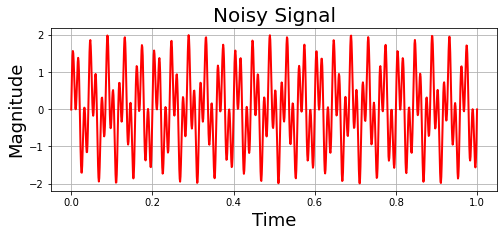

In [6]:

fig = plt.figure(figsize=(8, 3))
plt.plot(n, noisySignal, color='r', linewidth=2)
plt.grid(True)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Noisy Signal', fontsize=20)

Apply notch filter to the noisy signal using signal.filtfilt

In [7]:
outputSignal = signal.filtfilt(b_notch, a_notch, noisySignal)


Plots

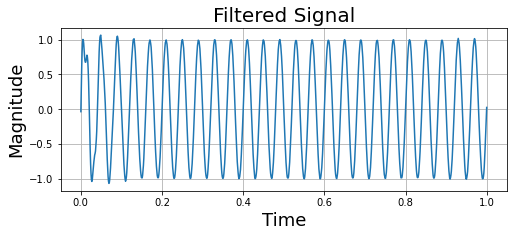

In [8]:

# Plot notch-filtered signal
fig = plt.figure(figsize=(8, 3))
plt.plot(n, outputSignal)
plt.grid(True)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.show()